<a href="https://colab.research.google.com/github/Madhumita1110/PySpark_ELT_pipeline/blob/main/A2_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

**What is Regression?**

Regression analysis is used to predict the value of a dependent variable based on the value of another independent variable/s. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other. 

**Dataset Description**

The Car Price Prediction Dataset has been taken from Kaggle. There are total 26 columns in the dataset which describe the different features of a car and its price depending on them. We are having total 206 samples. 

**Hypothesis**

We are required to model the price of cars with the available independent variables. Which variables are significant in predicting the price of a car. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
from google.colab import files
  

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

df.head() 

Saving CarPrice_Assignment.csv to CarPrice_Assignment (4).csv


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#label encoding of categorical variables

from sklearn.preprocessing import LabelEncoder

cols = ['CarName', 'fueltype', 'aspiration', 'doornumber','carbody' ,'drivewheel','enginelocation', 'enginetype','cylindernumber','fuelsystem']

# Encode labels of columns

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df = df.drop(['car_ID'], axis=1)

In [ ]:
df.describe()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


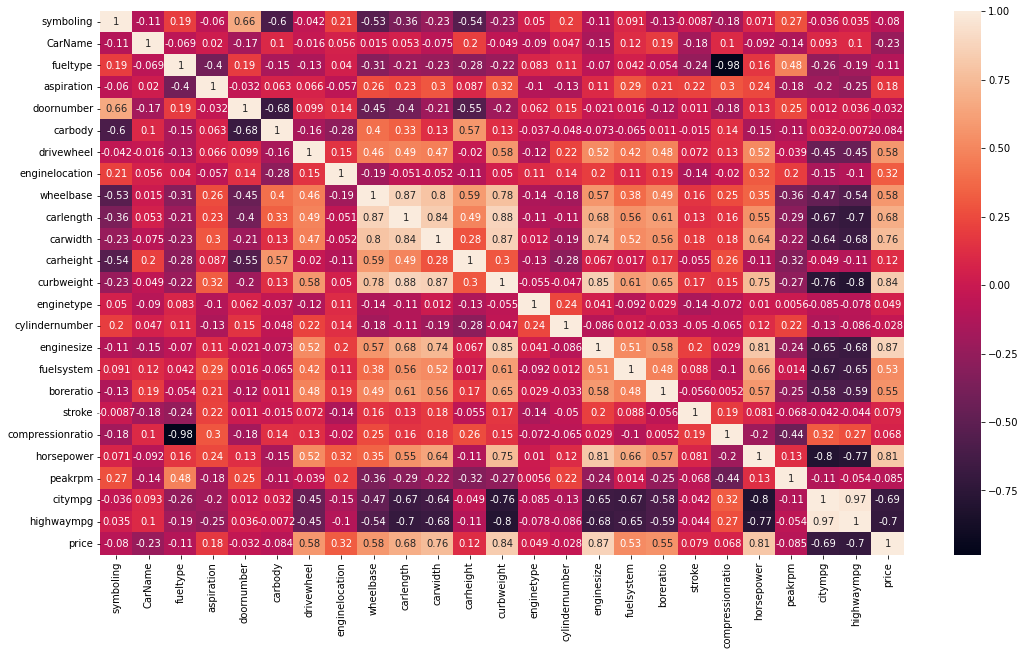

In [ ]:
# Is the data correlated?
corr_matrix = df.corr()

import seaborn as sn

plt.figure(figsize=(18,10))
sn.heatmap(corr_matrix, annot=True)
plt.show()

See from the heatmap that few features like curbweight, enginesize, horsepower and carwidth are having high collinearity with the target price as compared to other price.

Let us first scale our data on a standard normal scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
# standardization 
df1 = scaler.fit_transform(df)
df1 = pd.DataFrame(df1,columns=[df.columns])
df1.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-1.838221,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,1.743470,-1.813780,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.133509,-1.862662,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,...,0.604046,0.869568,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.938490,-1.789339,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,...,-0.431076,0.869568,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.938490,-1.764897,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,...,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668


Let us define our dependent variable y as 'price' and all other variables as independent variables X.

In [ ]:
y = df1.iloc[:, 24:] #dependent variable
X = df1.iloc[:, 0:24] #independent variable

Split dataset into train and test data for prediction.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Linear Regression**

As we have more than one independent variables X, we will apply multilinear regression model on our dataset and record its performance by calculating R2_score, MSE, MAE and RMSE. The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable. 

**R2_score** :R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. 

**MSE** :Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals. 

**RMSE** :Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals. 

**MAE** :The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

Score test data: 0.8113230018091971
score train data:  0.9157845788747837
MAE: 0.31751770282339803
MSE: 0.22998875492569945
RMSE: 0.4795714283875755


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


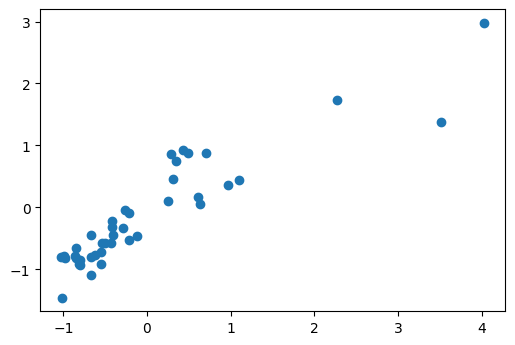

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

#train model with linear regression 
clf = LinearRegression()
clf.fit(X_train, y_train)

# r2 score train predictions
acc1=clf.score(X_train,y_train)
print('score train data: ', acc1)

# r2 score test predictions
predictions = clf.predict(X_test)
print("Score test data:", clf.score(X_test, y_test))

#plot true prices vs predicted prices
plt.figure(dpi=100)
plt.scatter(y_test, predictions)

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

We got a 82% test accuracy with all independent variables. But the train data accuracy is 90%. So, our model is slightly overfitted. We can address this issue by regularisation  by L1(Lasso) or L2(Ridge) Regression.

[0.00344903]
[[ 6.61677863e-02 -1.42914331e-01  1.42863055e-01  5.91478221e-02
  -7.91277857e-02 -9.11935135e-02  9.71530396e-02  1.81198735e-01
   1.40208053e-01 -8.99447963e-02  1.85416203e-01  8.06803840e-02
   1.62243930e-01  1.26246870e-02  5.64696730e-05  4.07458863e-01
   2.43628392e-03 -4.92092608e-02 -1.02064435e-01  1.90148244e-01
   1.55496864e-01  5.12108223e-02  6.95152997e-02 -5.73194426e-02]]


<BarContainer object of 24 artists>

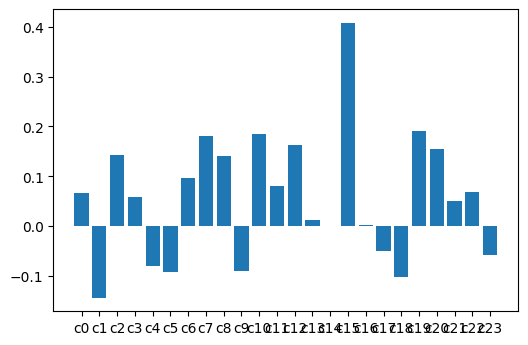

In [ ]:
print(clf.intercept_)
print(clf.coef_)
x=clf.coef_[0]
x
plt.figure(dpi=100)


plt.bar(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16','c17','c18','c19','c20','c21','c22','c23'], x)


See how much each independent variable is contributing to predicting price. c15 which is enginesize contributes the highest.

Let us reduce dimensionality using PCA and train the model again. We will take 10 best features which contribute to our prediction.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X2 = pca.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Score test data: 0.7811344894653968
score train data:  0.8876085973814627
MAE: 0.3358945698797272
MSE: 0.23325682265892048
RMSE: 0.4829666889744266


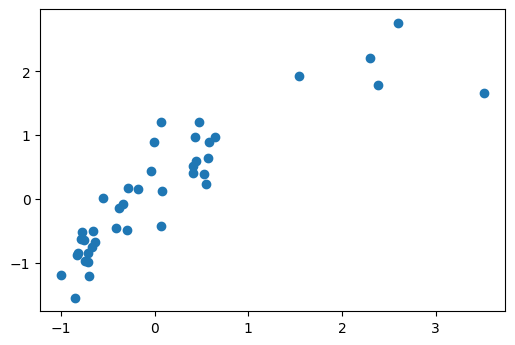

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score test data:", clf.score(X_test, y_test))

acc1=clf.score(X_train,y_train)
print('score train data: ', acc1)

plt.figure(dpi=100)
plt.scatter(y_test, predictions)

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

We got a slightly better accuracy with PCA with reduced MSE.

[0.00960173]
[[ 0.30524558  0.09640459  0.0940501   0.03902765  0.13756046  0.16580801
  -0.09911411  0.23715141  0.1114222   0.00054861]]


<BarContainer object of 10 artists>

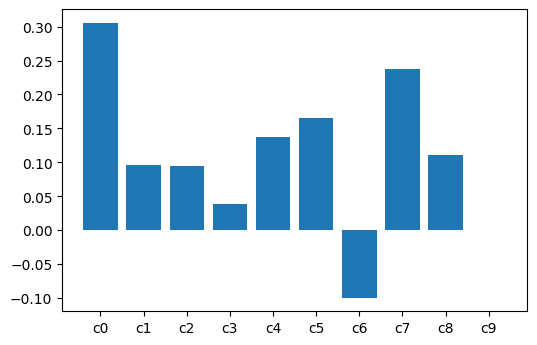

In [ ]:
#visualise feature correlation with target after pca

print(clf.intercept_)
print(clf.coef_)

x=clf.coef_[0]
x
plt.figure(dpi=100)


plt.bar(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], x)

**Polynomial Regression**

Polynomial Regression is a form of Linear regression known as a special case of Multiple linear regression which estimates the relationship as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Score test data: -3.208292924738993
score train data:  1.0
MAE: 1.3180969498717228
MSE: 5.129719358501697
RMSE: 2.2648883766096946


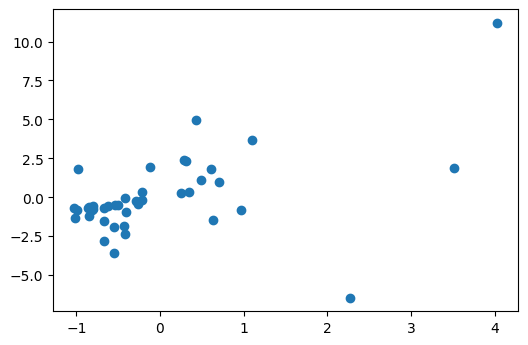

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(3), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(np.array(X_train), y_train)

predictions =pipeline.predict(X_test)

print("Score test data:", pipeline.score(X_test, y_test))

acc1=pipeline.score(X_train,y_train)
print('score train data: ', acc1)

#true vs predicted values
plt.figure(dpi=100)
plt.scatter(y_test, predictions)

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

We got a bad test score since our data is overfitted with polynomial regression since our independent variables show a non-linear relationship with dependent variable. But our price predictions are best described by a multi linear regression.

**L1 and L2 Regularization**

L1 regularization is the preferred choice when having a high number of features as it provides sparse solutions. Even, we obtain the computational advantage because features with zero coefficients can be avoided. The regression model that uses L1 regularization technique is called Lasso Regression.

L2 regularization can deal with the multicollinearity (independent variables are highly correlated) problems through constricting the coefficient and by keeping all the variables. L2 regression can be used to estimate the significance of predictors and based on that it can penalize the insignificant predictors. A regression model that uses L2 regularization techniques is called Ridge Regression.


We will use L2 regularization here since we have highly correlated independent variables in our dataset.

In [ ]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = Ridge()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))



Score: 0.8132663374194528
MAE: 0.317120133516487
MSE: 0.22761991642555812
RMSE: 0.47709529071827794


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
